In [324]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [375]:
def potential(phi,mass2,vev):
    lmda4 = np.abs(mass2)/4.0/vev**2
    return np.sum(lmda4*(phi**2-vev**2)**2)

def dVdphi(phi,mass2,vev):
    lmda4 = np.abs(mass2)/4.0/vev**2
    return 4.0*lmda4*(phi**2-vev**2)*phi

def epsilon(dphidN):
    return 0.5*np.sum(np.array(dphidN)**2)

def slowrollEoM(phi,t0,mass2,vev):
    hubble2 = potential(phi,mass2,vev)/3.0
    
    return -dVdphi(phi,mass2,vev)/3.0/hubble2

nfields=500
mass2 = np.linspace(1e-10,1e-9,nfields)
vevs = np.random.uniform(0.1,1.00,nfields)
phi0 = np.random.uniform(0.0,1.0e-10,nfields)

vparams = (mass2,vevs)


In [376]:
tsteps = np.linspace(0,1000,10000)  

traj = integrate.odeint(slowrollEoM,phi0,tsteps,args=vparams,tcrit=[0.0],rtol=1e-6,atol=1e-70)

trajEps=[]
for phi in traj:
    trajEps.append(epsilon(slowrollEoM(phi,0.0,mass2,vevs)))
trajEps = np.array(trajEps)

[427 196 207  89 311]


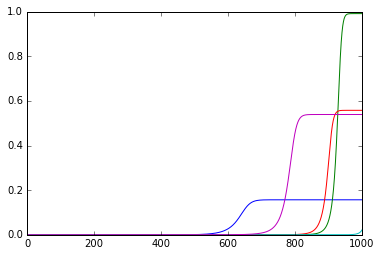

In [377]:
#traj = np.log10(traj)

nSR = np.argmin(trajEps<0.9)
if nSR==0: nSR=len(trajEps)
plotTraj = traj[0:nSR]

plotTime = tsteps[0:nSR]

testPlot = np.random.choice(xrange(0,nfields),5)

print testPlot

for plotter in testPlot:
    #plt.plot(plotTime,np.log10(plotTraj[:,plotter]))
    plt.plot(plotTime,(plotTraj[:,plotter]))



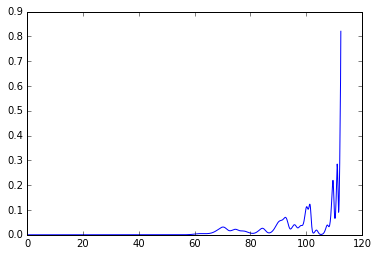

In [374]:
plt.plot(plotTime,trajEps[0:nSR])

In [370]:
integrate.odeint?